# Basic 🧠

`NiftiCore` loads a volumetric image and by passing a 3D origin to `.get_image`, the origins image slices are put into a 2D layout

In [1]:
from niftiview import NiftiCore, TEMPLATES

template_filepath = TEMPLATES['ch2']  # 'ch2', 'T1' or 'mni152'
nic = NiftiCore(template_filepath)
im = nic.get_image(layout='sagittal++', origin=[0, 0, 0], height=400)
print(type(im))

<class 'numpy.ndarray'>


`.get_image` returns a 2D NumPy array with 400 rows for `height=400`

Let's plot it via `matplotlib` (but be aware that this should normally be done using [`NiftiImage`](https://github.com/codingfisch/niftiview/blob/main/examples/image.ipynb))

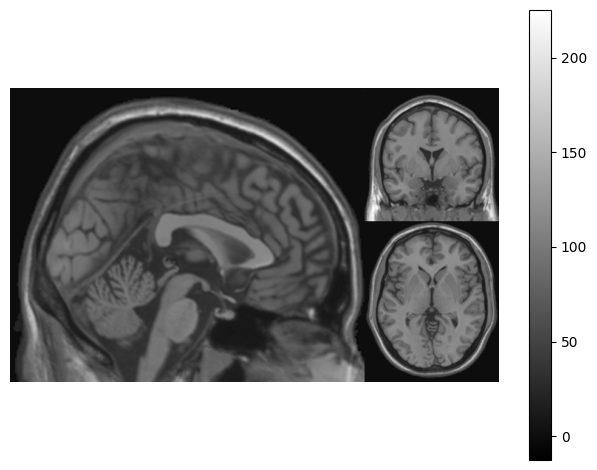

In [2]:
import matplotlib.pyplot as plt

plt.imshow(im, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.tight_layout()

# Layout 🧩
Layout uses the expert jargon for left-right (sagittal), front-back (coronal) and bottom-top (axial)

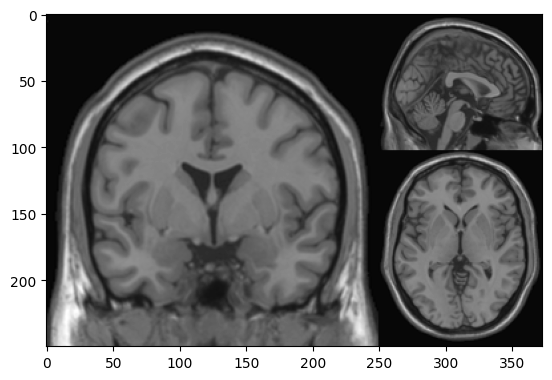

In [3]:
im = nic.get_image(layout='coronal++', origin=[0, 0, 0], height=250)
plt.imshow(im, cmap='gray');  # quick and dirty plot 

As you can see, 'coronal++' shows the coronal plane in large and the two other planes in small

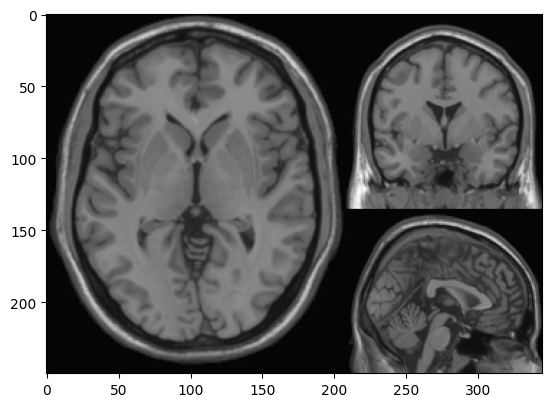

In [4]:
im = nic.get_image(layout='axial++', origin=[0, 0, 0], height=250)
plt.imshow(im, cmap='gray');

Similarly, 'axial++' shows the axial plane in large and the two other planes in small

The default layout (used when no layout is given) is `all`, showing all planes with equal height 

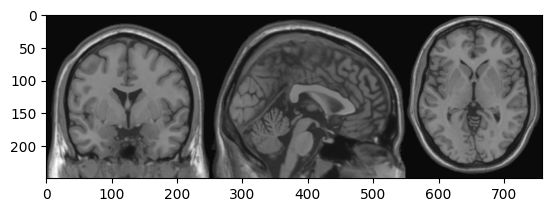

In [5]:
im = nic.get_image(layout='all', origin=[0, 0, 0], height=250)
plt.imshow(im, cmap='gray');

# Origin 🧭
Let's change the first coordinate of the origin to see what changes

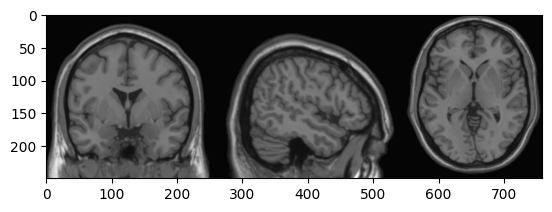

In [6]:
im = nic.get_image(origin=[50, 0, 0], height=250)
plt.imshow(im, cmap='gray');

Since the origin contains coordinates in the order (*sagittal*, *coronal*, *axial*), the
1. coordinate affects the **sagittal (left-right) plane**
2. coordinate affects the **coronal (back-front) plane**
3. coordinate affects the **axial (bottom-top) plane**

# Input file formats 💾

`NiftiCore` obviously supports the NIfTI file format (.nii or .nii.gz), e.g. used for the templates provided by `niftiview`,

In [7]:
print(TEMPLATES)

{'T1': '/home/lfisch/Projects/niftiview_beta/niftiview/data/niftis/templates/T1.nii.gz', 'ch2': '/home/lfisch/Projects/niftiview_beta/niftiview/data/niftis/templates/ch2.nii.gz', 'mni152': '/home/lfisch/Projects/niftiview_beta/niftiview/data/niftis/templates/mni152.nii.gz'}


but also supports a bunch of older file formats (.img, .mnc, mnc2, .BRIK and .REC).

# Advanced 🧠🧠

## Custom Layout 🧩
By using the initials of sagittal (s), coronal (c) and axial (a), a custom `layout` can be created

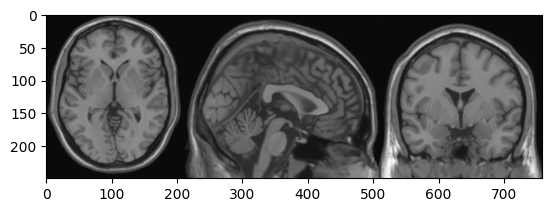

In [8]:
im = nic.get_image(layout='a|s|c', origin=[0, 0, 0], height=250)
plt.imshow(im, cmap='gray');

Instead of `|` one can use `/` to stack two (not more) planes vertically

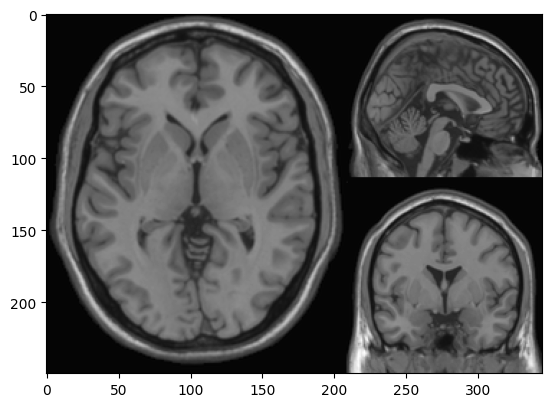

In [9]:
im = nic.get_image(layout='a|s/c', origin=[0, 0, 0], height=250)
plt.imshow(im, cmap='gray');

Finally, multiplane layouts can be created by passing the coordinates (in the scanner system) via squared brackets

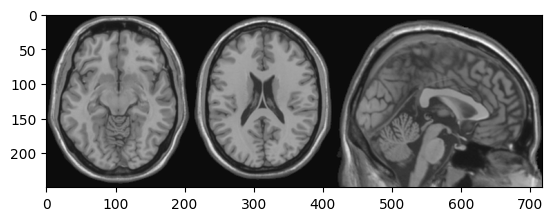

In [10]:
im = nic.get_image(layout='a[-10]|a[20]|s', origin=[0, 0, 0], height=250)
plt.imshow(im, cmap='gray');

## Passing `nibabel` image to `NiftiCore`
Via `NiftiCore(nib_image=...)`, a `nibabel` image can be used instead of a filepath

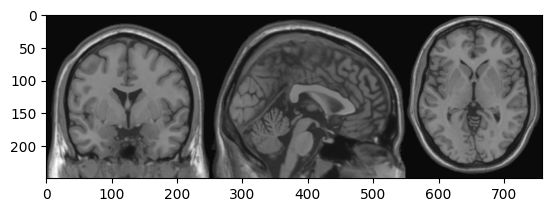

In [11]:
import nibabel as nib

img = nib.load(template_filepath)
img = nib.as_closest_canonical(img)  # ensures proper orientation

nic = NiftiCore(nib_image=img)
im = nic.get_image(height=250)
plt.imshow(im, cmap='gray');  # quick and dirty plot 

## Passing `numpy.ndarray` to `NiftiCore`
Via `Nifti(array=...)`, a `numpy` array can be used instead of a filepath...

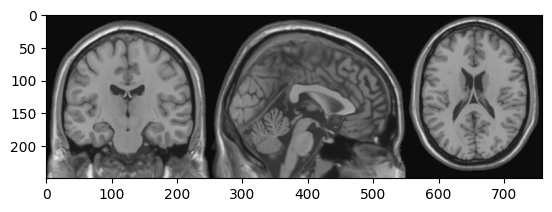

In [12]:
array = img.get_fdata()

nic = NiftiCore(array=array)
im = nic.get_image(height=250)
plt.imshow(im, cmap='gray');

...but it results in a different image than `nib_image`. For consistent images, the `affine` should be passed along!

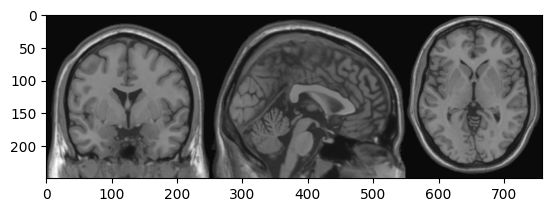

In [13]:
nic = NiftiCore(array=array, affine=img.affine)  # pass affine for consistent origin
im = nic.get_image(height=250)
plt.imshow(im, cmap='gray'); 

# Speed 💨
`Nifti.get_image` only takes a few milliseconds. Check it out by running the cell below!

In [14]:
from tqdm import tqdm

images = []
for i in tqdm(range(-80, 80)):
    im = nic.get_image(origin=[i, 0, 0], height=250)
    images.append(im)

100%|██████████| 160/160 [00:00<00:00, 550.81it/s]
